In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC

In [2]:
cancer = load_breast_cancer()
X_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y_cancer = pd.Series(cancer.target)

In [3]:
X_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
X_cancer.shape, y_cancer.shape

((569, 30), (569,))

In [5]:
y_cancer.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [7]:
y_cancer.value_counts()

1    357
0    212
Name: count, dtype: int64

In [8]:
X = X_cancer.copy()
y = y_cancer.copy()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [9]:
X_train_full.shape, X_test.shape, y_train_full.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [10]:
print("Training set class distribution:")
print(y_train_full.value_counts(normalize=True))

print("Test set class distribution:")
print(y_test.value_counts(normalize=True))


Training set class distribution:
1    0.626374
0    0.373626
Name: proportion, dtype: float64
Test set class distribution:
1    0.631579
0    0.368421
Name: proportion, dtype: float64


In [11]:
from sklearn.model_selection import train_test_split

# 80-20 train-test split with stratification and fixed random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Confirm the shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Class distribution check to verify stratification
print("\nClass distribution in y_train:")
print(y_train.value_counts(normalize=True))

print("\nClass distribution in y_test:")
print(y_test.value_counts(normalize=True))


X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)

Class distribution in y_train:
1    0.626374
0    0.373626
Name: proportion, dtype: float64

Class distribution in y_test:
1    0.631579
0    0.368421
Name: proportion, dtype: float64


In [12]:
from sklearn.preprocessing import StandardScaler

# Step 1: Initialize the scaler
scaler = StandardScaler()

# Step 2: Fit ONLY on training data
scaler.fit(X_train)

# Step 3: Transform both training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Convert to DataFrame to inspect
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)

# Step 4: Verify scaling on first 3 features
print("\nMeans of first 3 scaled features (should be ~0):")
print(np.mean(X_train_scaled_df.iloc[:, :3], axis=0))

print("\nStd devs of first 3 scaled features (should be ~1):")
print(np.std(X_train_scaled_df.iloc[:, :3], axis=0))



Means of first 3 scaled features (should be ~0):
mean radius      -2.928061e-16
mean texture      6.246530e-16
mean perimeter   -1.629954e-16
dtype: float64

Std devs of first 3 scaled features (should be ~1):
mean radius       1.0
mean texture      1.0
mean perimeter    1.0
dtype: float64


In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize logistic regression model
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Train (fit) the model on the scaled training data
log_reg.fit(X_train_scaled, y_train)


LogisticRegression(random_state=42, solver='liblinear')

In [14]:
y_pred = log_reg.predict(X_test_scaled)


In [17]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy on test set: {accuracy:.4f}")


 Accuracy on test set: 0.9825



 Confusion Matrix:
 [[41  1]
 [ 1 71]]


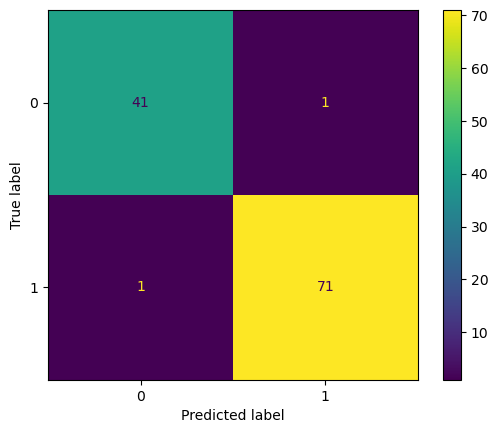

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Basic confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\n Confusion Matrix:\n", cm)

# Optional: Display the confusion matrix as a plot
ConfusionMatrixDisplay.from_estimator(log_reg, X_test_scaled, y_test)


In [20]:
from sklearn.metrics import classification_report

print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=cancer.target_names))



 Classification Report:
              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Build pipeline: Scaling + Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', random_state=42))
])


In [23]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation using accuracy as metric
cv_scores = cross_val_score(logreg_pipeline, X, y, cv=5, scoring='accuracy')

# Print individual scores
print(" Cross-validation accuracy scores for each fold:", cv_scores)

# Mean and standard deviation
print(f" Mean CV accuracy: {cv_scores.mean():.4f}")
print(f" Std deviation of CV scores: {cv_scores.std():.4f}")


 Cross-validation accuracy scores for each fold: [0.98245614 0.97368421 0.97368421 0.97368421 0.99115044]
 Mean CV accuracy: 0.9789
 Std deviation of CV scores: 0.0070


In [24]:
# Fit pipeline on training data
logreg_pipeline.fit(X_train, y_train)

# Predict on test set
y_test_pred_pipe = logreg_pipeline.predict(X_test)

# Accuracy
test_accuracy_pipe = accuracy_score(y_test, y_test_pred_pipe)
print(f"Final pipeline test accuracy: {test_accuracy_pipe:.4f}")


Final pipeline test accuracy: 0.9825


In [25]:
from sklearn.ensemble import RandomForestClassifier

# Pipeline with StandardScaler
rf_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [27]:
# Train pipeline on training data
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_rf_pred = rf_pipeline.predict(X_test)

# Accuracy
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f" Random Forest test accuracy: {rf_accuracy:.4f}")

# Confusion matrix
rf_cm = confusion_matrix(y_test, y_rf_pred)
print("\n Random Forest Confusion Matrix:\n", rf_cm)

# Classification report
print("\n Random Forest Classification Report:")
print(classification_report(y_test, y_rf_pred, target_names=cancer.target_names))


 Random Forest test accuracy: 0.9561

 Random Forest Confusion Matrix:
 [[39  3]
 [ 2 70]]

 Random Forest Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.93      0.94        42
      benign       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

